# Combine batches

**Let's combine the batched soups and find out how many usable webscrapes we have**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
for i in range(1,88):
    if i == 1:
        batch = pd.read_csv('./batch{}.csv'.format(i), index_col='index')
        batch.drop(batch.columns[0], axis=1, inplace=True)
    else:
        csv = pd.read_csv('./batch{}.csv'.format(i), index_col='index')
        csv.drop(csv.columns[0], axis=1, inplace=True)
        batch = pd.concat([batch, csv])

In [3]:
batch.isnull().sum()

HTML    228
dtype: int64

In [4]:
#Empty HTML means successful request but no content.  Will fill in
batch.loc[(batch['HTML'].isnull())]

,HTML
index,
50,NaN
1532,NaN
2344,NaN
2024,NaN
2376,NaN
2377,NaN
2860,NaN
2963,NaN
3333,NaN


In [5]:
batch.fillna('empty', inplace=True)

In [6]:
batch.loc[(batch['HTML'] == 'empty')]

,HTML
index,
50,empty
1532,empty
2344,empty
2024,empty
2376,empty
2377,empty
2860,empty
2963,empty
3333,empty


In [7]:
batch.shape

(5077, 1)

In [8]:
df = pd.read_csv('./HealthMap_Scraped.csv')

In [9]:
df.shape

(7724, 14)

In [10]:
df.loc[(df['URL'] == 'deleted')]

,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,Long,Lat,Smooshed Parser Extract,Place Categories
23,"Idaho, United States",United States,Waterborne Illness,Humans,5375030,About 100 Jerome homes under boil order - KMVT,deleted,10/11/17 18:19,Breaking,2,-114.191902,43.644001,XXXXXX XXXXXX KMVT,NaN
46,"Mayetta, Kansas, United States",United States,Waterborne Illness,Humans,5336960,"Boil order for the City of Mayetta, Jackson Co...",deleted,9/23/17 18:38,Context,0,-95.722481,39.338890,XXXXXX XXXXXX WIBW,NaN
55,"Belton, Texas, United States",United States,Waterborne Illness,Humans,5328884,Belton: Dog Ridge Water Supply Corp. issues bo...,deleted,9/19/17 11:29,Context,0,-97.464447,31.056009,XXXXXX Belton: Dog Ridge Water Supply Corp. i...,NaN
102,"Cleveland County, Oklahoma, United States",United States,Waterborne Illness,Humans,5290083,Boil order issued Friday for part of Cleveland...,deleted,9/1/17 17:46,Warning,2,-97.300308,35.200069,XXXXXX Boil order issued Friday for part of C...,NaN
175,"Ketchikan, Alaska, United States",United States,Waterborne Illness,Humans,5251409,High levels of wastewater bacteria found at Al...,deleted,8/15/17 9:24,Warning,0,-131.646103,55.342220,XXXXXX High levels of wastewater bacteria fou...,NaN
287,"Newport, Rhode Island, United States",United States,Waterborne Illness,Humans,5207423,Several more RI beaches closed to swimming due...,deleted,7/26/17 16:31,Warning,2,-71.312828,41.490101,NaN,NaN
288,"North Kingstown, Rhode Island, United States",United States,Waterborne Illness,Humans,5207423,Several more RI beaches closed to swimming due...,deleted,7/26/17 16:31,Warning,2,-71.466171,41.550102,NaN,NaN
289,"Portsmouth, Rhode Island, United States",United States,Waterborne Illness,Humans,5207423,Several more RI beaches closed to swimming due...,deleted,7/26/17 16:31,Warning,2,-71.250328,41.602325,NaN,NaN
385,"Benton County, Arkansas, United States",United States,Waterborne Illness,Humans,5177872,Boil order issued in Benton - Benton Courier,deleted,7/15/17 22:21,Warning,0,-94.333542,36.333412,XXXXXX Benton Courier,NaN
442,"Pennyrile Forest State Resort Park, Kentucky, ...",United States,Waterborne Illness,Humans,5157049,Pennyrile Beach closed because of e. coli - Th...,deleted,7/7/17 1:09,Warning,2,-87.663223,37.073090,XXXXXX The Messenger (subscription),NaN


In [11]:
merged_df = pd.merge(df, batch, left_index=True, right_index=True, how='left')

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7724 entries, 0 to 7723
Data columns (total 15 columns):
Location                   7724 non-null object
Country                    7724 non-null object
Disease                    7724 non-null object
Species                    7724 non-null object
HM Alert ID                7724 non-null int64
Headline                   7724 non-null object
URL                        7724 non-null object
Issue Date                 7724 non-null object
Alert Tag                  7724 non-null object
Dup Count                  7724 non-null int64
Long                       7724 non-null float64
Lat                        7724 non-null float64
Smooshed Parser Extract    5170 non-null object
Place Categories           193 non-null object
HTML                       5077 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 905.2+ KB


In [13]:
merged_df['HTML'].isnull().sum()

2647

In [14]:
merged_df.loc[merged_df['URL'] == 'deleted', 'HTML'] = 'deleted'

In [15]:
merged_df['HTML'].isnull().sum()

299

In [16]:
merged_df['HTML'] = merged_df['HTML'].fillna('request error')

In [17]:
merged_df.loc[(merged_df['HTML'].isnull())]

,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,Long,Lat,Smooshed Parser Extract,Place Categories,HTML


In [18]:
merged_df.iloc[18, :]

Location                                                 Ohio, United States
Country                                                        United States
Disease                                                   Waterborne Illness
Species                                                               Humans
HM Alert ID                                                          5380983
Headline                       The Ohio County Monitor - Ohio County Monitor
URL                        http://news.google.com/news/url?sa=t&fd=R&ct2=...
Issue Date                                                    10/14/17 12:11
Alert Tag                                                            Context
Dup Count                                                                  0
Long                                                                -83.0127
Lat                                                                  40.2459
Smooshed Parser Extract     XXXXXX Email FRANKFORT, Ky. ÛÓ Acting to end...

In [19]:
num_empty = merged_df.loc[(merged_df['HTML'] == 'empty')].shape[0]
num_empty

228

In [20]:
num_request_err = merged_df.loc[(merged_df['HTML'] == 'request error')].shape[0]
num_request_err

299

In [21]:
num_deleted = merged_df.loc[(merged_df['URL'] == 'deleted')].shape[0]
num_deleted

2348

In [22]:
num_usable = merged_df.shape[0] - num_deleted - num_empty - num_request_err
num_usable

4849

In [23]:
tags = ["Usable", "Deleted", "Empty", "Bad Requests"]
counts = [num_usable, num_deleted, num_empty, num_request_err]
print(tags)
print(counts)

['Usable', 'Deleted', 'Empty', 'Bad Requests']
[4849, 2348, 228, 299]


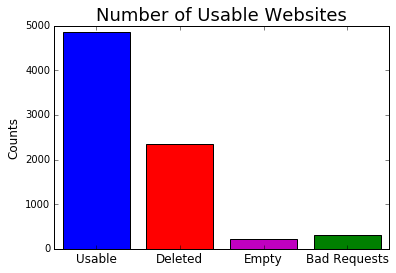

In [24]:
plt.bar(np.arange(len(tags)), counts, align='center', color=['b', 'r', 'm', 'g'])
plt.xticks(np.arange(len(tags)), tags, fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Number of Usable Websites", fontsize=18)

In [25]:
merged_df['Issue Date'] = pd.to_datetime(merged_df['Issue Date'])

In [26]:
merged_df.tail()

,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,Long,Lat,Smooshed Parser Extract,Place Categories,HTML
7719,"Lake O' the Pines, Texas, United States",United States,Waterborne Illness,Humans,449959,Lake O' The Pines closed due to E. Coli outbre...,http://news.google.com/news/url?fd=R&sa=T&url=...,2010-06-19 19:35:00,Breaking,1,-94.497139,32.751808,"XXXXXX KLTV 7 News Tyler, Longview, Jacksonvi...",NaN,request error
7720,"Missouri, United States",United States,Waterborne Illness,Humans,436974,DNR Has Improved Its Way of Informing Public R...,http://news.google.com/news/url?fd=R&sa=T&url=...,2010-05-30 13:16:00,Context,1,-92.504898,38.238098,XXXXXX DNR Has Improved Its Way of Informing ...,NaN,request error
7721,"Saratoga Springs, Utah, United States",United States,Waterborne Illness,Humans,427961,Water Source of Campylobacter Outbreak in Utah...,http://news.google.com/news/url?fd=R&sa=T&url=...,2010-05-15 05:01:00,Warning,3,-111.904655,40.349117,XXXXXX Water Source of Campylobacter Outbreak...,Foodborne outbreak,request error
7722,"Cape Girardeau County, Missouri, United States",United States,Waterborne Illness,Humans,424775,Apparent outbreak of E. coli from water at spo...,http://news.google.com/news/url?fd=R&sa=T&url=...,2010-05-10 17:45:00,Breaking,2,-89.716766,37.383385,XXXXXX Apparent outbreak of E. coli from wate...,NaN,request error
7723,"Jackson, Missouri, United States",United States,Waterborne Illness,Humans,424683,E. coli outbreak near Cape Girardeau - St. Lou...,http://news.google.com/news/url?fd=R&sa=T&url=...,2010-05-10 15:55:00,Breaking,4,-89.666206,37.382275,XXXXXX St. Louis Post-Dispatch (blog),NaN,request error


In [27]:
useable_soups_2017 = 0
useable_soups_2016 = 0
useable_soups_2015 = 0
useable_soups_2014 = 0
useable_soups_2013 = 0
useable_soups_2012 = 0
useable_soups_2011 = 0
useable_soups_2010 = 0
for k, i in enumerate(merged_df['Issue Date']):
    if i.year == 2017:
        if merged_df.HTML[k] == 'request error' or merged_df.HTML[k] == 'empty' or merged_df.HTML[k] == 'deleted':
            pass
        else:
            useable_soups_2017 += 1
    
    elif i.year == 2016:
        if merged_df.HTML[k] == 'request error' or merged_df.HTML[k] == 'empty' or merged_df.HTML[k] == 'deleted':
            pass
        else:
            useable_soups_2016 += 1
            
    elif i.year == 2015:
        if merged_df.HTML[k] == 'request error' or merged_df.HTML[k] == 'empty' or merged_df.HTML[k] == 'deleted':
            pass
        else:
            useable_soups_2015 += 1
            
    elif i.year == 2014:
        if merged_df.HTML[k] == 'request error' or merged_df.HTML[k] == 'empty' or merged_df.HTML[k] == 'deleted':
            pass
        else:
            useable_soups_2014 += 1
    
    elif i.year == 2013:
        if merged_df.HTML[k] == 'request error' or merged_df.HTML[k] == 'empty' or merged_df.HTML[k] == 'deleted':
            pass
        else:
            useable_soups_2013 += 1
            
    elif i.year == 2012:
        if merged_df.HTML[k] == 'request error' or merged_df.HTML[k] == 'empty' or merged_df.HTML[k] == 'deleted':
            pass
        else:
            useable_soups_2012 += 1
            
            
    elif i.year == 2011:
        if merged_df.HTML[k] == 'request error' or merged_df.HTML[k] == 'empty' or merged_df.HTML[k] == 'deleted':
            pass
        else:
            useable_soups_2011 += 1
            
    elif i.year == 2010:
        if merged_df.HTML[k] == 'request error' or merged_df.HTML[k] == 'empty' or merged_df.HTML[k] == 'deleted':
            pass
        else:
            useable_soups_2010 += 1

useable_soups = []
useable_soups.extend([useable_soups_2017,
                    useable_soups_2016,
                    useable_soups_2015,
                    useable_soups_2014,
                    useable_soups_2013,
                    useable_soups_2012,
                    useable_soups_2011,
                    useable_soups_2010])

In [28]:
useable_soups_2017

866

In [29]:
useable_soups

[866, 661, 676, 650, 955, 877, 163, 1]

In [30]:
year_tags = sorted(list(range(2010, 2018)), reverse=True)
year_tags

[2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]

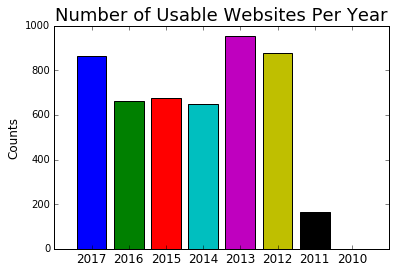

In [31]:
plt.bar(np.arange(len(year_tags)), useable_soups, align='center', color=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'])
plt.xticks(np.arange(len(year_tags)), year_tags, fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Number of Usable Websites Per Year", fontsize=18)

In [32]:
from bs4 import BeautifulSoup

In [36]:
soup = BeautifulSoup(merged_df.HTML[0], 'lxml')

In [37]:
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<!--[if lt IE 7 ]><html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#" class="ie6 "> <![endif]-->
<!--[if IE 7 ]><html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#" class="ie7 "> <![endif]-->
<!--[if IE 8 ]><html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#" class="ie8 "> <![endif]-->
<!--[if IE 9 ]><html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#" class="ie9 "> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#">
 <!--<![endif]-->
 <head>
  <base href="http://murrayledger.com/content/tncms/live/"/>
  <meta content="noarchive" name="googlebot"/>
  <meta content="MURRAY — City of Murray Director of Public Works &amp;amp; Utilities Tom Kutcher updated Mayor Jack Rose and the members of the city council Thursday ab

In [38]:
soup.p['class']

['story-times', 'dtstamp']

In [97]:
merged_df.URL[0]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGmA0yAoTj-LEPjIRxm5NB9akVvVw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779651867230&ei=Cc7yWaC_H9G7zAKcpws&url=http://murrayledger.com/news/kutcher-tells-council-about-water-situation/article_2020569a-bac6-11e7-82f8-1f4b918f38ae.html'

In [117]:
merged_df.Headline[0]

'Kutcher tells Council about water situation - Murray Ledger and Times'

In [55]:
print(merged_df.HTML[0])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<!--[if lt IE 7 ]><html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#" class="ie6 "> <![endif]--><!--[if IE 7 ]><html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#" class="ie7 "> <![endif]--><!--[if IE 8 ]><html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#" class="ie8 "> <![endif]--><!--[if IE 9 ]><html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#" class="ie9 "> <![endif]--><!--[if (gt IE 9)|!(IE)]><!--><html class="" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#"> <!--<![endif]-->
<head>
<base href="http://murrayledger.com/content/tncms/live/"/>
<meta content="noarchive" name="googlebot"/>
<meta content="MURRAY — City of Murray Director of Public Works &amp;amp; Utilities Tom Kutcher updated Mayor Jack Rose and the members of the city council Thursday about the ongoi

In [33]:
import re

In [82]:
for key, html in enumerate(merged_df.HTML):
    if html == 'request error' or html == 'empty' or html == 'deleted':
        pass
    else:
        string = str(re.findall(r'<p.+<',merged_df.HTML[key]))
        string = re.sub(r'<.+?>', '', string)
        string = re.sub(r'{.+?}', '', string)
        string = re.sub(r'[Pr][Rr][Ii][Vv][Aa][Cc][Yy]', '', string)
        string = re.sub(r'[Tt][Ee][Rr][Mm][Ss] [Oo][Ff] [Uu][Ss][Ee]', '', string)
        string = re.sub(r'[Cc][Oo][Nn][Tt][Ee][Nn][Tt]', '', string)
        string = re.sub(r'[Ss][Uu][Bb][Ss][Cc][Rr][Ii][Bb][Ee]', '', string)
        string = re.sub(r'[Ss][Uu][Bb][Ss][Cc][Rr][Ii][Pp][Tt][Ii][Oo][Nn]', '', string)
        string = re.sub(r'[Oo][Nn][Ll][Ii][Nn][Ee]', '', string)
        string = re.sub(r'[Bb][Rr][Oo][Ww][Ss][Ee][Rr]', '', string)
        string = re.sub(r'[Gg][Oo][Oo][Gg][Ll][Ee]', '', string)
        string = re.sub(r'[Ff][Aa][Cc][Ee][Bb][Oo][Oo][Kk]', '', string)
        string = re.sub(r'[Tt][Ww][Ii][Tt][Tt][Ee][Rr]', '', string)
        string = re.sub(r'[Ll][Ii][Nn][Kk][Ee][Dd][Ii][Nn]', '', string)
        string = re.sub(r'\\xa0', '', string)
        string = re.sub(r'&amp', '', string)
        string = re.sub(r'\\', '', string)
        string = string.strip("[]'\/><|&~{}")
        merged_df.at[key, 'text'] = string

In [83]:
merged_df.text[0]

"Logging in from multiple locations may be the cause.MURRAY — City of Murray Director of Public Works ; Utilities Tom Kutcher updated Mayor Jack Rose and the members of the city council Thursday about the ongoing water situation in Murray during Thursday’s regularly-scheduled meeting at City Hall.Two construction incidents Wednesday night led to an estimated 27,000 customers in the city and throughout Calloway County being placed under a boil water order. Kutcher said the five operators of the city’s drinking water facility on L.P. Miller Drive, along with all 12 workers with a contractor handling the job, were working around the clock to get the situation under control Thursday.Have an  ?Need an  ?Multi-month  for  only access to the Murray Ledger ; Times without paper route delivery. access for current print rsWe're always interested in hearing about news in our community. Let us know what's going on!Submit newsmurrayledger.commurrayledger.comSearch in:© Copyright 2017, Murray Ledger

In [36]:
test = str(re.findall(r'<p.+<',merged_df.HTML[0]))
test = re.sub(r'<.+?>', '',test)
test = re.sub(r'[Pr][Rr][Ii][Vv][Aa][Cc][Yy]', '', test)
test = re.sub(r'[Tt][Ee][Rr][Mm][Ss] [Oo][Ff] [Uu][Ss][Ee]', '', test)
test = re.sub(r'[Cc][Oo][Nn][Tt][Ee][Nn][Tt]', '', test)
test = re.sub(r'[Ss][Uu][Bb][Ss][Cc][Rr][Ii][Bb][Ee]', '', test)
test = re.sub(r'[Oo][Nn][Ll][Ii][Nn][Ee]', '', test)
test = re.sub(r'[Bb][Rr][Oo][Ww][Ss][Ee][Rr]', '', )
test = re.sub(r'[Gg][Oo][Oo][Gg][Ll][Ee]')
test = re.sub
test.strip("[]'\/><|&~{}")

"Logging in from multiple locations may be the cause.MURRAY — City of Murray Director of Public Works &amp; Utilities Tom Kutcher updated Mayor Jack Rose and the members of the city council Thursday about the ongoing water situation in Murray during Thursday’s regularly-scheduled meeting at City Hall.\\xa0Two construction incidents Wednesday night led to an estimated 27,000 customers in the city and throughout Calloway County being placed under a boil water order. Kutcher said the five operators of the city’s drinking water facility on L.P. Miller Drive, along with all 12 workers with a contractor handling the job, were working around the clock to get the situation under control Thursday.\\xa0Have an  subscription?Need an  subscription?Multi-month subscription for  only access to the Murray Ledger &amp; Times without paper route delivery. access for current print rsWe\\'re always interested in hearing about news in our community. Let us know what\\'s going on!Submit newsmurrayledger.co

**Things to delete across all sites:  Privacy, Terms of Use, Content, Subscribe, online, browser, google, facebook, linkedin, twitter**

In [84]:
merged_df.loc[(merged_df['text'].isnull())]

,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,Long,Lat,Smooshed Parser Extract,Place Categories,HTML,text
18,"Ohio, United States",United States,Waterborne Illness,Humans,5380983,The Ohio County Monitor - Ohio County Monitor,http://news.google.com/news/url?sa=t&fd=R&ct2=...,2017-10-14 12:11:00,Context,0,-83.012703,40.245899,"XXXXXX Email FRANKFORT, Ky. ÛÓ Acting to end...",NaN,request error,NaN
23,"Idaho, United States",United States,Waterborne Illness,Humans,5375030,About 100 Jerome homes under boil order - KMVT,deleted,2017-10-11 18:19:00,Breaking,2,-114.191902,43.644001,XXXXXX XXXXXX KMVT,NaN,deleted,NaN
46,"Mayetta, Kansas, United States",United States,Waterborne Illness,Humans,5336960,"Boil order for the City of Mayetta, Jackson Co...",deleted,2017-09-23 18:38:00,Context,0,-95.722481,39.338890,XXXXXX XXXXXX WIBW,NaN,deleted,NaN
50,"Pender County, North Carolina, United States",United States,Waterborne Illness,Humans,5334651,Pender County rescinds boil order - Port City ...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,2017-09-22 12:22:00,Context,0,-77.966377,34.500439,XXXXXX Port City Daily,NaN,empty,NaN
55,"Belton, Texas, United States",United States,Waterborne Illness,Humans,5328884,Belton: Dog Ridge Water Supply Corp. issues bo...,deleted,2017-09-19 11:29:00,Context,0,-97.464447,31.056009,XXXXXX Belton: Dog Ridge Water Supply Corp. i...,NaN,deleted,NaN
64,"Cocoa, Florida, United States",United States,Waterborne Illness,Humans,5319289,"UPDATE: Cocoa Water Issues Cancels Boil Ban, D...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,2017-09-15 12:10:00,Context,1,-80.741997,28.386120,XXXXXX SpaceCoastDaily.com,NaN,request error,NaN
102,"Cleveland County, Oklahoma, United States",United States,Waterborne Illness,Humans,5290083,Boil order issued Friday for part of Cleveland...,deleted,2017-09-01 17:46:00,Warning,2,-97.300308,35.200069,XXXXXX Boil order issued Friday for part of C...,NaN,deleted,NaN
138,"Trenton, Missouri, United States",United States,Waterborne Illness,Humans,5268112,Boil Water Advisory - Trenton Republican Times,http://news.google.com/news/url?sa=t&fd=R&ct2=...,2017-08-22 15:44:00,Warning,0,-93.616608,40.078899,NaN,NaN,request error,NaN
164,"Paddock Lake, Wisconsin, United States",United States,Waterborne Illness,Humans,5255225,"Aug. 16, 2017 lake test results: Paddock Hooke...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,2017-08-16 15:44:00,Warning,1,-88.105087,42.577518,XXXXXX West of the I,NaN,request error,NaN
165,"Silver Lake, Wisconsin, United States",United States,Waterborne Illness,Humans,5255225,"Aug. 16, 2017 lake test results: Paddock Hooke...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,2017-08-16 15:44:00,Warning,1,-88.492920,43.076611,XXXXXX West of the I,NaN,request error,NaN


# Feature Extraction/Modeling

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.stem import PorterStemmer
import string
from nltk.corpus import stopwords

In [88]:
# Code taken from Richard Harris
def cleaner(text):
    stemmer = PorterStemmer()
    stop = stopwords.words('english')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.translate(str.maketrans('', '', string.digits))
    text = text.lower().strip()
    final_text = []
    for w in text.split():
        if w not in stop:
            final_text.append(stemmer.stem(w.strip()))
    return ' '.join(final_text)

In [85]:
text = pd.DataFrame(merged_df['text'])
text.dropna(inplace=True)

In [89]:
text.values

array([[ "Logging in from multiple locations may be the cause.MURRAY — City of Murray Director of Public Works ; Utilities Tom Kutcher updated Mayor Jack Rose and the members of the city council Thursday about the ongoing water situation in Murray during Thursday’s regularly-scheduled meeting at City Hall.Two construction incidents Wednesday night led to an estimated 27,000 customers in the city and throughout Calloway County being placed under a boil water order. Kutcher said the five operators of the city’s drinking water facility on L.P. Miller Drive, along with all 12 workers with a contractor handling the job, were working around the clock to get the situation under control Thursday.Have an  ?Need an  ?Multi-month  for  only access to the Murray Ledger ; Times without paper route delivery. access for current print rsWe're always interested in hearing about news in our community. Let us know what's going on!Submit newsmurrayledger.commurrayledger.comSearch in:© Copyright 2017, Murr

In [56]:
print(merged_df.HTML[7718])

<html lang="en"><head><meta content="text/html; charset=utf-8" http-equiv="content-type"/><title>Redirect Notice</title><style>body,div,a{font-family:arial,sans-serif}body{background-color:#fff;margin-top:3px}div{color:#000}a:link{color:#00c}a:visited{color:#551a8b}a:active{color:red}div._lFe{border-top:1px solid #bbb;border-bottom:1px solid #bbb;background:#f2f2f2;margin-top:1em;width:100%}div._kFe{padding:0.5em 0;margin-left:10px}div._jFe{margin-left:35px;margin-top:35px}</style><script>function go_back(){window.history.go(-1);return false;}

function ctu(oi,ct){var link = document && document.referrer;var esc_link = "";var e = window && window.encodeURIComponent ?encodeURIComponent :escape;if (link){esc_link = e(link);}
new Image().src = "/url?sa=T&url=" + esc_link + "&oi=" + e(oi)+ "&ct=" + e(ct);return false;}
</script></head><body><div class="_lFe"><div class="_kFe"><font style="font-size:larger"><b>Redirect Notice</b></font></div></div><div class="_jFe"> The previous page is sen

In [97]:
# May want to try binary setting for LDA but let's try it without.
cv = CountVectorizer(preprocessor=cleaner, min_df=3, binary=True)
X = cv.fit_transform(text['text'].values)
X

<4849x15551 sparse matrix of type '<class 'numpy.int64'>'
	with 621622 stored elements in Compressed Sparse Row format>

In [98]:
feature_names = cv.get_feature_names()
feature_names

['aa',
 'aaaâ',
 'aaclickfunctionnelseifslelseifshtml',
 'aagold',
 'aaron',
 'aarp',
 'aattrhrefhttpwwwnexstartvjqueri',
 'aaupdat',
 'aaview',
 'aawarwick',
 'ab',
 'abandon',
 'abat',
 'abbey',
 'abbi',
 'abbott',
 'abc',
 'abccom',
 'abdomin',
 'abduct',
 'abductionlee',
 'abductionupd',
 'abdullah',
 'aberdeen',
 'abid',
 'abil',
 'abita',
 'abl',
 'ablebodi',
 'abmceducationorg',
 'abnorm',
 'aboard',
 'abodi',
 'aboil',
 'aboilwat',
 'abort',
 'about',
 'aboutpinterestbeach',
 'aboutpinterestboil',
 'aboutpinterestboilwat',
 'aboutpinterestupd',
 'aboutpinterestwat',
 'abouttwocas',
 'abovetrump',
 'abraham',
 'abras',
 'abridg',
 'abrupt',
 'abruptli',
 'absenc',
 'absent',
 'absente',
 'absolut',
 'absorb',
 'abund',
 'abundantphilharmon',
 'abus',
 'ac',
 'academ',
 'academi',
 'academiesth',
 'academy',
 'academycuyahoga',
 'academyhelm',
 'academyrichmond',
 'acc',
 'acceler',
 'accept',
 'access',
 'accessar',
 'accessbeach',
 'accessboil',
 'accessboilwat',
 'accessclick'

In [99]:
lda = LatentDirichletAllocation(n_topics=2)

lda.fit(X)

C:\Users\knockitupanotch\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\Users\knockitupanotch\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1, n_topics=2,
             perp_tol=0.1, random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [107]:
print(lda.components_.shape)

(4, 12272)


In [108]:
results = pd.DataFrame(lda.components_, columns=feature_names)

In [102]:
for topic in range(2):
    print('Topic', topic)
    word_list = results.T[topic].sort_values(ascending=False).index
    print(' '.join(word_list[0:25]), '\n')

Topic 0
man right year pm state decemb monday arrest yearold counti est offic say school new news polic trump charg peopl team famili nation connect one 

Topic 1
water boil issu order use drink news depart main counti area said system test resid custom advisori citi break one minut updat may lift comment 



In [110]:
cv = CountVectorizer(preprocessor=cleaner, min_df=4, binary=True)
X = cv.fit_transform(text['text'].values)
X

<4849x12272 sparse matrix of type '<class 'numpy.int64'>'
	with 611785 stored elements in Compressed Sparse Row format>

In [111]:
feature_names = cv.get_feature_names()
feature_names

['aa',
 'aaclickfunctionnelseifslelseifshtml',
 'aaron',
 'aattrhrefhttpwwwnexstartvjqueri',
 'aaupdat',
 'aaview',
 'ab',
 'abandon',
 'abat',
 'abbey',
 'abbi',
 'abbott',
 'abc',
 'abccom',
 'abdomin',
 'abduct',
 'abdullah',
 'aberdeen',
 'abid',
 'abil',
 'abl',
 'ablebodi',
 'abnorm',
 'abodi',
 'aboil',
 'about',
 'aboutpinterestbeach',
 'aboutpinterestboil',
 'aboutpinterestupd',
 'aboutpinterestwat',
 'abouttwocas',
 'abovetrump',
 'abraham',
 'abras',
 'abridg',
 'abrupt',
 'abruptli',
 'absenc',
 'absent',
 'absolut',
 'abund',
 'abundantphilharmon',
 'abus',
 'ac',
 'academ',
 'academi',
 'academiesth',
 'academy',
 'acc',
 'accept',
 'access',
 'accessar',
 'accessbeach',
 'accessboil',
 'accessclick',
 'accessget',
 'accessmanag',
 'accesspleas',
 'accessupd',
 'accessw',
 'accesswat',
 'accid',
 'accident',
 'accommod',
 'accompani',
 'accomplic',
 'accomplish',
 'accord',
 'accordingli',
 'accordingly',
 'account',
 'accounta',
 'accountabund',
 'accountclear',
 'accoun

In [112]:
lda = LatentDirichletAllocation(n_topics= 4)

lda.fit(X)

C:\Users\knockitupanotch\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\Users\knockitupanotch\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1, n_topics=4,
             perp_tol=0.1, random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [113]:
for topic in range(4):
    print('Topic', topic)
    word_list = results.T[topic].sort_values(ascending=False).index
    print(' '.join(word_list[0:25]), '\n')

Topic 0
water beach bacteria use test health counti boil comment depart advisori system close park issu sampl level post citi contamin state new said result may 

Topic 1
decemb est monday pm yearold arrest man gmtupdat counti court illinoi dog year state citi sourc trump said hear begin offic gmtsourc two gmtthe injur 

Topic 2
water boil order said citi use main issu custom advisori resid drink break area system street may public news road wind counti work depart lift 

Topic 3
tuesday pm say wednesday var counti news man us school polic new year els decemb home state last kill christma servic texa woman offic weather 



In [116]:
conda install -c wordcloud

SyntaxError: invalid syntax (<ipython-input-116-69548c26f11f>, line 1)